### Installing Libraries I Will Need

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install opencv-python

# split to split images into train test
!pip install split-folders[full]



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: C:\Users\fastf\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image


### Introduction 

### Research and Data Exploration

In [3]:
import random

random.seed(1337)

In [4]:
#split the images into train/val/test
# import splitfolders
# splitfolders.ratio('data/ham10000/', output="data/ham10000/split", seed=1337,ratio=(.7,.1,.2), group_prefix=None, move=False)



In [5]:
#read metadata for the images
skin_df = pd.read_csv('Data/ham10000/HAM10000_metadata')


In [6]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [7]:
#create a dictionary of image ID's from file
image_path = {os.path.splitext(os.path.basename(x))[0]: x 
              for x in glob(os.path.join('data/ham10000/','*','*.jpg'))}

In [8]:
#Create new column from image path
skin_df['path'] = skin_df['image_id'].map(image_path.get)

#create new column with array of images with each one being resized to 32,32
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))


In [9]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,data/ham10000\images\ISIC_0027419.jpg,"[[[191, 152, 192], [194, 154, 193], [196, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,data/ham10000\images\ISIC_0025030.jpg,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,data/ham10000\images\ISIC_0026769.jpg,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,data/ham10000\images\ISIC_0025661.jpg,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,data/ham10000\images\ISIC_0031633.jpg,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,data/ham10000\images\ISIC_0033084.jpg,"[[[181, 164, 179], [179, 162, 176], [180, 163,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,data/ham10000\images\ISIC_0033550.jpg,"[[[4, 5, 3], [24, 22, 21], [101, 88, 88], [128..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,data/ham10000\images\ISIC_0033536.jpg,"[[[132, 119, 120], [157, 139, 138], [177, 158,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,data/ham10000\images\ISIC_0032854.jpg,"[[[160, 123, 144], [163, 131, 152], [166, 128,..."


In [10]:
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [11]:
#Had an error before where only half the images were being recognised - surprisingly only have the images were in the folder
len(skin_df['path'].drop_duplicates().tolist())

10015

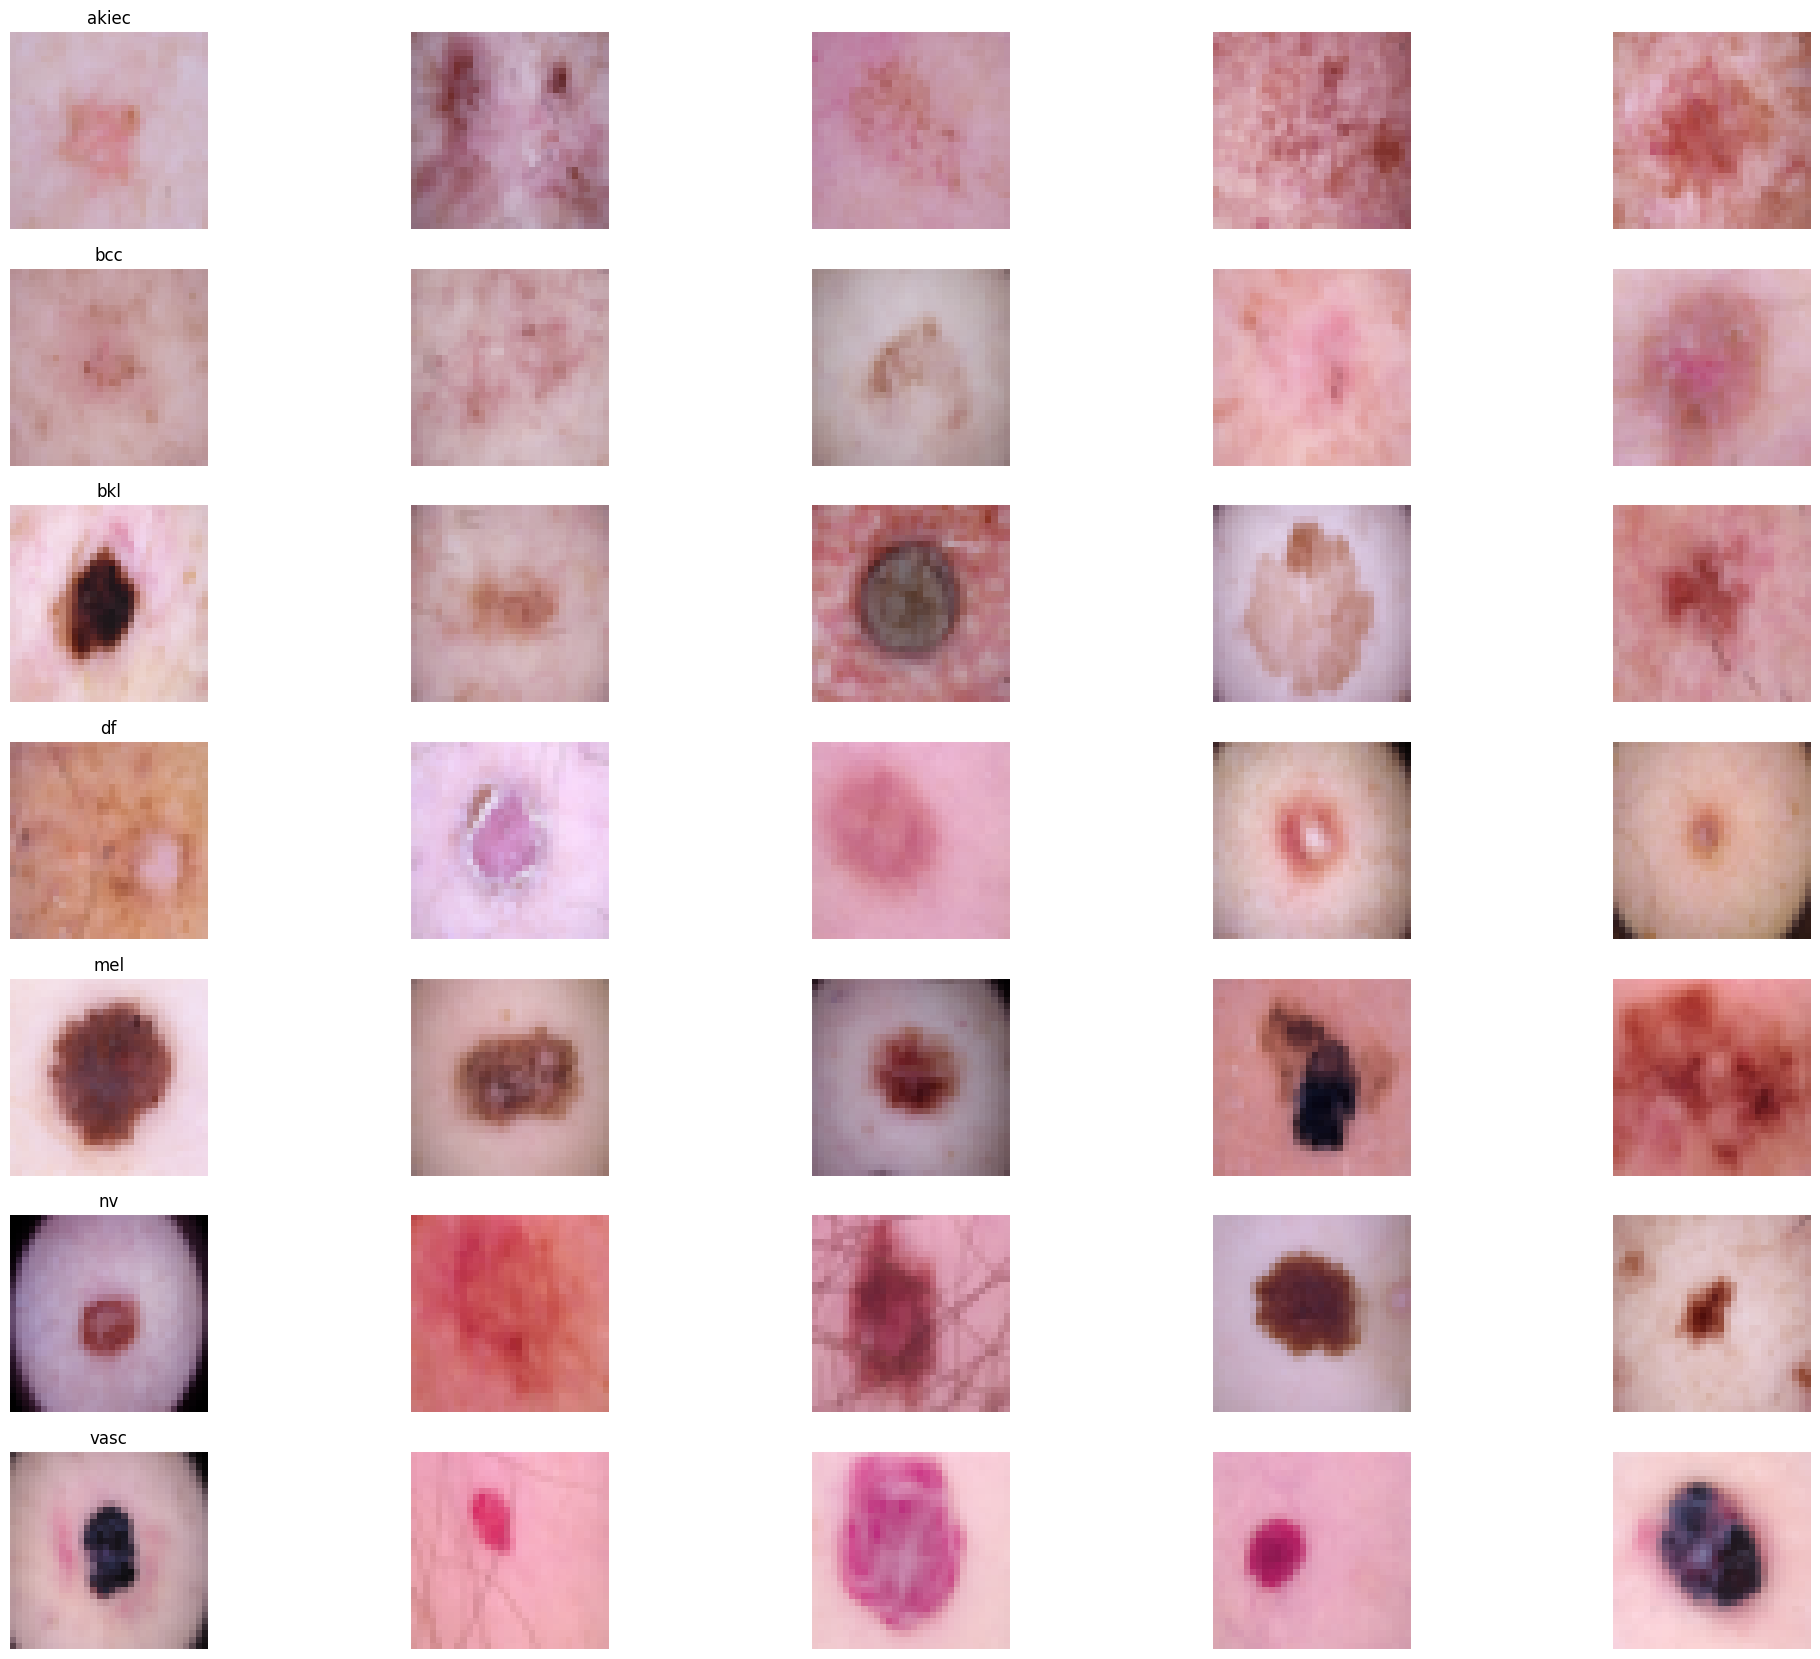

In [12]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (5*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)   
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

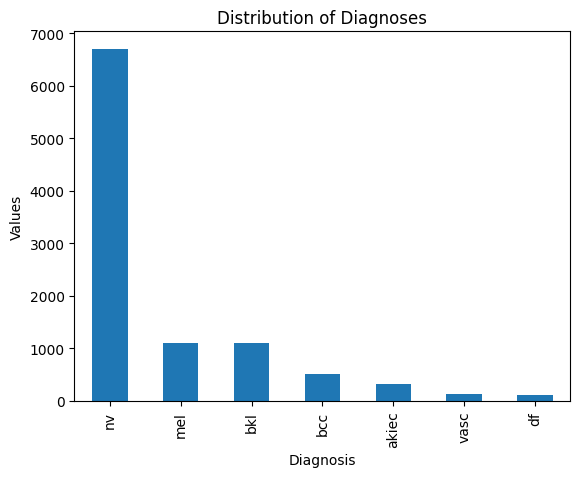

In [13]:
# Count the occurrences of each diagnosis
dx_counts = skin_df['dx'].value_counts()

# Plot the bar chart
dx_counts.plot(kind='bar')
plt.title("Distribution of Diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Values")
plt.show()

Seven generic classes :
•	Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
•	Basal cell carcinoma (bcc)
•	Benign keratosis-like lesions (bkl)
•	Dermatofibroma (df)
•	Melanoma (mel)
•	Melanocytic nevi (nv)
•	Vascular lesions (vasc)

There is quite a big imbalance in the full dataset with Melanocytic nevi (highest) being 6700 and df(lowest) 115


### Baseline Model:

### Solution Improvement:

### Conclusion and Future Direction